# Instructions

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.



## Identification

### Your Information

Your Last Name:

Your First Name:


### Group Members (list any classmates you worked with on this problem set)

Your Group Members:

# Textbook Reading

The two required readings for this week are textbook chapters relating to decision trees.

1. ISLP - Chapter 8, Introduction and Section 8.1. This provides useful background on the theory behind decision trees.
2. Géron - Chapter 6. A guide on implementing Decision Trees in `sklearn`. 

You should complete both of these readings in their entireties. 

There are also two optional readings for the week.

1. Martin, A., Quinn, K., Ruger, T., & Kim, P. (2004). - "Competing Approaches to Predicting Supreme Court Decision Making." Perspectives on Politics, 2(4), 761-767. This article uses classification trees to estimate how justices may rule on upcoming cases and compares the performance of their model to expert predictions. The application also demonstrates the interpretability of simple decision trees.
2. Loh, Wei‐Yin. "Classification and regression trees." Wiley interdisciplinary reviews: data mining and knowledge discovery 1.1 (2011): 14-23. This reading provides some extra examples of the theory behind classification trees. It also introduces and compares some of the different algorithms for fitting trees.




# Predicting Educational Achievement in Portugal

This problem draws upon results from the following paper on educational outcomes.

Cortez, Paulo, and Alice Maria Gonçalves Silva. "Using data mining to predict secondary school student performance." (2008)

The authors collected and evaluated data from two Portuguese secondary schools on a range of student attributes and performance outcomes. In this problem, you will analyze a subset of this data which is provided in the `students.csv` file. A full description of the variables is provided in the `student_characteristics.png` file.

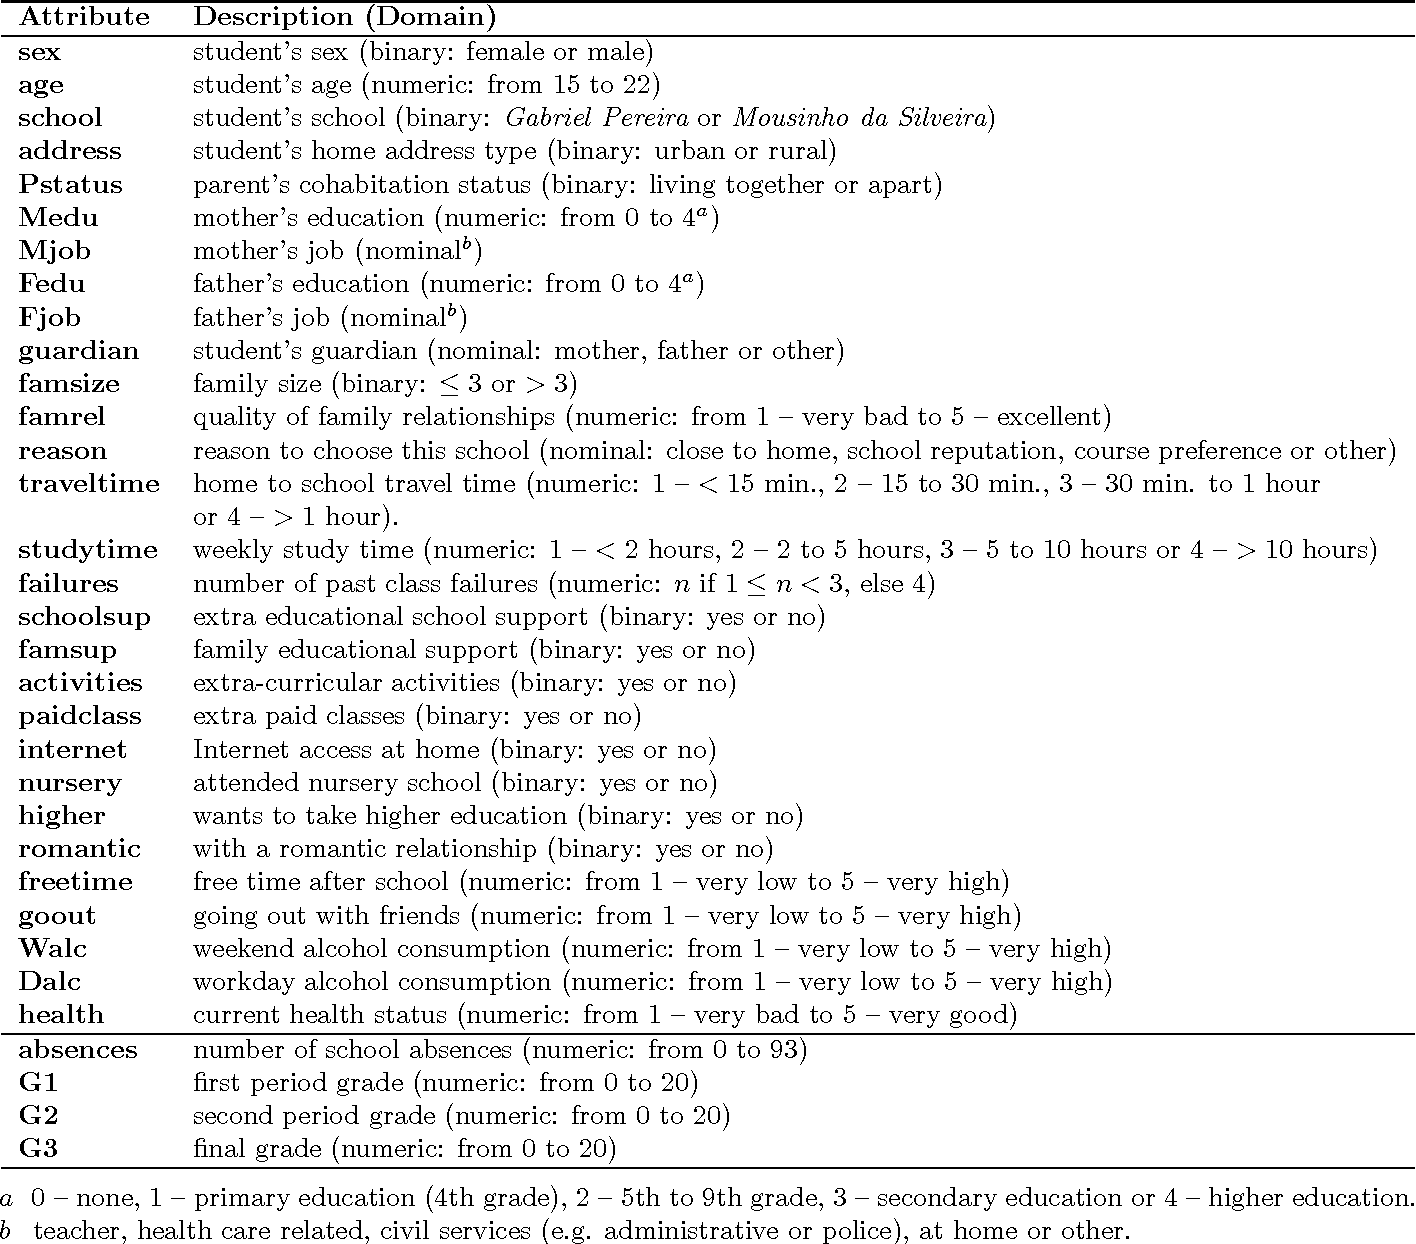

In [4]:
Image("../student_characteristics.png")

Our outcome of interest will be the variable `G3`, which reports the student's final language score. Earlier period grades `G1` and `G2` should be dropped for the following analysis.

## Pre-processing the Data

After reading in the data, inspect the list of variables and the associated data type each column has. Several of the columns may need to be transformed into categorical / dummy variables. 

Based on the above variable descriptions and your data exploration, identify and convert columns you think should be saved in a different format.

Note: The pandas function `pd.get_dummies()` or the sklearn `ColumnTransformer` and `OneHotEncoder` functions may be helpful here.

In [ ]:
# Your code here:

## Fitting a Basic Decision Tree

Fit a basic decision tree to predict `G3` using all other available variables (excluding `G1` and `G2`). Follow these steps:

1. Split the data into training and testing sets, using `random_state=422`, and set the testing size to 30% of the total observations
2. Set the `max_depth` of your tree to 1 
3. Report which variable is used for the initial split
4. Report the RMSE for predictions from this fitted tree on the testing data. Interpret and evaluate your results.

In [ ]:
# Your code here:

## Fitting an OLS Model

Using the same training / testing split as above, fit an ordinary least squares (OLS) [regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to the training set, predicting `G3` using all other variables (again excluding `G1` and `G2`). Report the RMSE for predictions from this model on the testing data. How does the error of your OLS model compare to the tree model?

In [ ]:
# Your code here:

## Recreating the Decision Tree with OLS

Run a linear regression on your data that will produce the same predicted values as your basic decision tree of depth 1 fit above.

Discuss how confident should we be with the estimated uncertainty in this model.

In [ ]:
# Your code here:

## Fitting a LASSO Model

Using the same training / testing split as above, fit a LASSO Model with cross-validation with the [LassoCV()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) function. Use `random_state=0` and use the default 5-fold cross-validation (set `cv=5` or leave this argument blank). Report the RMSE from this model on the testing data and compare it to the OLS fit.

In [ ]:
# Your code here:

## Fitting Trees with Greater Depth

1. Using the same training / testing split as above, fit a decision tree for a range of `max_depth` arguments from 1 to 15
2. Report which depth tree produces the smallest RMSE in the testing data and report the value of this RMSE
3. Plot the decision tree identified in Step 2
4. Describe how the best selected decision tree's predictions compare to the OLS predictions
5. Create a plot with the true values of the `G3` score in the testing data on the x-axis and the predicted values from the best model identified in Step 2 on the y-axis. Comment on any patterns in this plot.

In [ ]:
# Your code here:

## Cross-Validation and GridSearchCV

Your above code varied the parameter of `max_depth` in forming the tree, but that is not the only parameter available to calibrate tree models and attempt to avoid overfitting. The `max_leaf_nodes` parameter determines the total number of final nodes in the model (which may not be equal to the tree depth if further splitting only occurs along one path of the tree).

We can use cross-validation within our training sample to test a range of tree fitting parameters to see which generate the best fit. Read about [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and its [User Guide](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). This function allows you to specify multiple parameters to test (which could otherwise be accomplished with a nested for-loop).

Use this function to optimize your decision tree over both the `max_depth` and `max_leaf_nodes` parameters and report your results. How does the accuracy of this model in the testing data compare to your earlier models?

1. Test `max_depth` in a range from 1-20
2. Test `max_leaf_nodes` in a range of 2-40
3. Use `cv=5` parameter in the `GridSearchCV()` function to conduct 5-fold cross-validation
4. Set `scoring="neg_mean_squared_error"` to have the function optimize to find the smallest MSE

After running the grid search, report the best parameters you identified and re-fit a tree using these parameters. Report the RMSE in the testing data and plot the tree.

Note, this grid search may take a single-digit number of minutes to run.

In [ ]:
# Your code here:

## Decision Tree With Cost Complexity Pruning (OPTIONAL)

Another way to prevent a tree from overfitting is with cost-complexity pruning. This method first fits a large tree (perhaps a full tree to the data with no restrictions). It then begins at the bottom of the true and eliminates leaf nodes that do not add significant explanatory power (this processes is called _pruning_ or _pruning back_ the tree). 

This process is attractive because by initially growing a tree to full length, we can identify pairs of sequential splits that provide large increases in predictive performance that would be missed if we used a top-down approach that only looked at the performance gain from each step. Following this up by pruning away the less important branches can still adjust the tree to minimize overfitting.

### Growing an unrestricted tree

First, fit a tree with no restrictions on depth to the training data. Report the RMSE from this tree in both the training and testing data sets and comment on the results. You can do this by setting the `max_depth=None` argument or omitting this parameter altogether.

In [ ]:
# Your code here:

### Pruning the tree

Once grown this tree can be _pruned_, which will eliminate some of the nodes. Read the documentation for the cost-complexity pruning [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html). Implement this procedure to your decision tree using 5-fold cross-validation to determine the optimal cost-complexity pruning alpha value. Then fit a new decision tree on the training data where you pass this optimal value to  the `ccp_alpha` argument. Report the RMSE in the testing data for this tree and plot the tree itself.

In [ ]:
# Your code here:

## Comparing Various Models

This question asks you to compare your above results for four different models.

1. The OLS model
2. The LASSO model
3. The optimal decision tree chosen through the GridSearchCV()
4. The optimal decision tree chosen through cost-complexity pruning (OPTIONAL)

For each model, fill out the below table reporting both the MSE in the testing data and the number of features needed to make predictions. 

After completing this table, and including any other factors you consider relevant, which model would you use to estimate student grades? Justify your decision.

|    Model                      | Testing MSE | Features Needed for Prediction |
|---------------                  | ------------- | ---------- |
| OLS                                        |               |            |
| LASSO                                      |               |            |
| GridSearch Tree                            |               |            |
| Cost-complexity Pruning Tree (OPTIONAL)    |               |            |

# Predicting the Heart Data From Lecture

In recent classes we have worked with the `heart` data to try to predict the presence of heart disease. So far we have fit our models using default metrics of overall accuracy to select our hyperparameters (e.g. the `k` in a k-NN model or depth of decision trees).

There is no reason we have to rely on this default accuracy for this "hyperparameter tuning" process. Fit and tune a decision tree model to this heart data to optimize f1-score. If you need to specify a random state, set it as 422. 

Did your decision tree change at all relative to what was fit in class?

In [ ]:
# Your code here